# Exercise (level 1)

It is advised to read the introduction to numericpython and keep a numpy [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) nearby.

## Exercise 1:

Selection from [w3resources](https://www.w3resource.com/python-exercises/numpy/python-numpy-random.php)
and [rougier/numpy100](https://github.com/rougier/numpy-100)

In [2]:
import numpy as np

- Write a NumPy program to generate five random numbers from the normal distribution.

In [7]:
numpy.random.randn(5)

array([ 0.17508925, -0.45013602, -1.18819225,  0.4896363 ,  1.80768395])

- Write a NumPy program to generate six random integers between 10 and 30.

In [10]:
numpy.random.randint(10, high=31, size=(2, 3) )

array([[30, 22, 22],
       [13, 21, 28]])

- Create a 3x3 matrix with values ranging from 0 to 8

In [12]:
np.arange(0,9).reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

- Create 2d array $M$ such of size 3*3 such that $M_{ij} = i\times j$

In [16]:
M = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        M[i,j] = (i+1)*(j+1)
M

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

In [19]:
# with broadcast

In [25]:
x = np.arange(3,dtype=np.float)+1
x[:,None]*x[None,:]

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

In [30]:
%%time
M = np.zeros((100,100,100))
for i in range(100):
    for j in range(100):
        for k in range(100):
            M[i,j,k] = (i+1)*(j+1)*(k+1)
M

CPU times: user 448 ms, sys: 0 ns, total: 448 ms
Wall time: 456 ms


In [27]:
%%time
x = np.arange(100,dtype=np.float)+1
P = x[:,None,None]*x[None,:,None]*x[None,None,:]

CPU times: user 960 µs, sys: 4.11 ms, total: 5.07 ms
Wall time: 11.5 ms


In [31]:
abs(M-P).max()

0.0

In [33]:
import numba

In [42]:
@numba.jit
def f(N):
    M = np.zeros((N,N,N))
    for i in range(N):
        for j in range(N):
            for k in range(N):
                M[i,j,k] = (i+1)*(j+1)*(k+1)
    return M


In [44]:
%%time
M = f(100)

CPU times: user 137 µs, sys: 4.09 ms, total: 4.22 ms
Wall time: 4.32 ms


- Create 3 vectors of length 5 and create a matrix where each column is one of the vector.

In [55]:
vectors = [np.random.randn(5) for i in range(3)]

In [56]:
vectors

[array([-0.45404675, -0.74070995,  1.20926052,  0.57787955, -2.04673641]),
 array([-0.88158749,  1.76865298,  1.59363059, -2.09440431, -0.90370468]),
 array([-0.67731682,  1.25913192, -0.64553654, -0.17389547, -0.8267965 ])]

In [57]:
np.concatenate([e[:,None] for e in vectors], axis=1)

array([[-0.45404675, -0.88158749, -0.67731682],
       [-0.74070995,  1.76865298,  1.25913192],
       [ 1.20926052,  1.59363059, -0.64553654],
       [ 0.57787955, -2.09440431, -0.17389547],
       [-2.04673641, -0.90370468, -0.8267965 ]])

In [59]:
np.column_stack(vectors)

array([[-0.45404675, -0.88158749, -0.67731682],
       [-0.74070995,  1.76865298,  1.25913192],
       [ 1.20926052,  1.59363059, -0.64553654],
       [ 0.57787955, -2.09440431, -0.17389547],
       [-2.04673641, -0.90370468, -0.8267965 ]])

- Create 3 vectors of length 5 and create a matrix where each row is one of the vector.

In [60]:
np.row_stack(vectors)

array([[-0.45404675, -0.74070995,  1.20926052,  0.57787955, -2.04673641],
       [-0.88158749,  1.76865298,  1.59363059, -2.09440431, -0.90370468],
       [-0.67731682,  1.25913192, -0.64553654, -0.17389547, -0.8267965 ]])

In [61]:
np.concatenate([e[None,:] for e in vectors], axis=0)

array([[-0.45404675, -0.74070995,  1.20926052,  0.57787955, -2.04673641],
       [-0.88158749,  1.76865298,  1.59363059, -2.09440431, -0.90370468],
       [-0.67731682,  1.25913192, -0.64553654, -0.17389547, -0.8267965 ]])

- Find indices of non-zero elements from `np.array([1,2,0,0,4,0])`. Replace them with -1.0

In [62]:
x = np.array([1,2,0,0,4,0])

In [66]:
np.where(x)

(array([0, 1, 4]),)

In [67]:
x==0

array([False, False,  True,  True, False,  True])

In [69]:
ind = np.where(x==0)[0]
ind

array([2, 3, 5])

In [70]:
x[ind]= -1.0

In [71]:
x

array([ 1,  2, -1, -1,  4, -1])

In [72]:
x[x==-1] = -2.0
x

array([ 1,  2, -2, -2,  4, -2])

In [74]:
x[~(x>0)] = 0.0

In [75]:
x

array([1, 2, 0, 0, 4, 0])

- Write a NumPy program to normalize a 3x3 random matrix. (Define norm $|x|=\sqrt{\sum x_i^2}$ and compute $M/|M|$)

In [76]:
M = numpy.random.randn(3,3)

In [ ]:
# def norm(x):
#     return ...

In [84]:
norm = lambda X: np.sqrt( (X**2).sum() )

In [91]:
M

array([[-0.03892042,  0.04846884,  0.57387846],
       [ 1.24991626, -0.19815342, -0.50825544],
       [-1.45735984,  0.39765515, -0.68856411]])

In [96]:
norm(M)

2.2246859080532615

In [93]:
M/norm(M)

array([[-0.0174948 ,  0.02178682,  0.25795932],
       [ 0.56183943, -0.08907029, -0.22846166],
       [-0.65508566,  0.17874665, -0.30951071]])

In [94]:
numpy.linalg.norm(M, ord=2)

1.980519524127101

- Take a random matrix $A$ of size $N\times 2$ (N=10) where each line represents a different 2d point. Compute the euclidean distance matrix such that $E_{ij}$ is the distance between point $i$ and point $j$.

In [101]:
N = 10
A = np.random.rand(N,2)
C = np.zeros((N,N))
for i in range(N):
    for j in range(i):
        x = A[i,:]
        y = A[j,:]
        C[i,j] = norm(x-y)
        C[j,i] = C[i,j]

In [102]:
C

array([[0.        , 0.72313341, 0.2266717 , 0.3025916 , 0.34668171,
        0.69812998, 0.46967901, 0.64339911, 0.82163689, 0.25225729],
       [0.72313341, 0.        , 0.50104232, 0.4860401 , 0.81769054,
        0.19760516, 0.46068104, 0.8552427 , 0.81699094, 0.61413248],
       [0.2266717 , 0.50104232, 0.        , 0.12062498, 0.39158336,
        0.47346816, 0.2927246 , 0.59540795, 0.71206155, 0.18630846],
       [0.3025916 , 0.4860401 , 0.12062498, 0.        , 0.33998497,
        0.41183869, 0.17586815, 0.49012031, 0.59244596, 0.12879402],
       [0.34668171, 0.81769054, 0.39158336, 0.33998497, 0.        ,
        0.70651927, 0.38870168, 0.32345627, 0.54691186, 0.21421106],
       [0.69812998, 0.19760516, 0.47346816, 0.41183869, 0.70651927,
        0.        , 0.32082151, 0.68640089, 0.62392506, 0.52701604],
       [0.46967901, 0.46068104, 0.2927246 , 0.17586815, 0.38870168,
        0.32082151, 0.        , 0.4036032 , 0.44254465, 0.23863938],
       [0.64339911, 0.8552427 , 0.5954079

- Create A of size $10\times 3$. Create matrix $B$ with the same column as $A$ reordered by sum of absolute values.

In [133]:
A = np.random.randn(10,3)

In [134]:
L = [ A[:,i].sum() for i in range(3)]

In [135]:
I = np.argsort(L)

In [140]:
np.column_stack( [A[:,i] for i in I] )

array([[ 1.61184462, -0.02635346, -0.29469068],
       [ 1.15263408,  1.92181695,  1.75189434],
       [ 0.05214527, -0.18967092, -0.79785173],
       [-0.76555175, -1.28754006,  0.12939743],
       [-1.91112839, -0.43068525,  0.24503046],
       [-0.14466326, -1.37495917, -0.1886754 ],
       [-1.02765755,  1.39415398,  0.84862519],
       [ 0.50579909, -1.54589567, -0.15602946],
       [ 0.03568229,  0.29871862,  0.27135354],
       [-1.7879893 , -0.37812154,  0.34835953]])

In [145]:
A[:,np.argsort(A.sum(axis=0))]

array([[ 1.61184462, -0.02635346, -0.29469068],
       [ 1.15263408,  1.92181695,  1.75189434],
       [ 0.05214527, -0.18967092, -0.79785173],
       [-0.76555175, -1.28754006,  0.12939743],
       [-1.91112839, -0.43068525,  0.24503046],
       [-0.14466326, -1.37495917, -0.1886754 ],
       [-1.02765755,  1.39415398,  0.84862519],
       [ 0.50579909, -1.54589567, -0.15602946],
       [ 0.03568229,  0.29871862,  0.27135354],
       [-1.7879893 , -0.37812154,  0.34835953]])

## Exercise 2: simulate AR1

Take an AR1 process $x_t = A \rho x_{t-1} + \epsilon_t$ with $\epsilon_t \sim \Sigma$ where $\Sigma$ is a positive definite matrix.

- Define 2x2 matrices $A$ and $\Sigma$, the latter being symmetric positive definite

In [148]:
A = np.diag([0.9, 0.8])
Σ = np.diag([0.05, 0.025])

- Compute asymptotic variance using matrix algebra (there is a recursive formula)

$V^N = \sum_{n=0}^N A^n \Sigma (A^{\prime})^n$

In [181]:
K = 1000
tol = 1e-8
V = np.zeros((2,2))
T_n = Σ
for n in range(K):
    V = V + T_n
    T_n = A@T_n@A.T 
    err = norm(T_n)
    if err<tol:
        print(f"Finished in {n} iterations")
        break
V

Finished in 73 iterations


array([[0.26315785, 0.        ],
       [0.        , 0.06944444]])

- Simulate $N$ draws for $T$ periods and store the result in `sim`.

In [216]:
N = 10000
T = 200

In [217]:
sim = np.zeros((T, 2, N))

In [218]:
for t in range(T-1):
    y0 = sim[t, :,:]
    ϵ = np.random.multivariate_normal([0,0], Σ, N).T
    y1 = A@y0 + ϵ
    sim[t+1,:,:] = y1

- Compute ergodic variance (bonus compute std of the variance estimate)

In [219]:
sim[199].var() # incorrect

0.16526992789031952

- Plot a few simulations on the same graph

In [220]:
from matplotlib import pyplot as plt

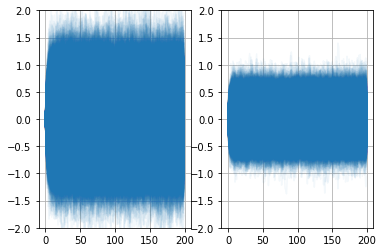

In [221]:
plt.subplot(1,2,1)
for n in range(N):
    plt.plot( sim[:,0,n], color='C0', alpha=0.05 )
plt.ylim(-2,2)
plt.grid()
plt.subplot(1,2,2)
for n in range(N):
    plt.plot( sim[:,1,n], color='C0', alpha=0.05 )
plt.ylim(-2,2)
plt.grid()

(array([  21.,  196.,  781., 1919., 2803., 2453., 1298.,  439.,   81.,
           9.]),
 array([-1.77909441, -1.40611764, -1.03314087, -0.6601641 , -0.28718733,
         0.08578944,  0.45876621,  0.83174298,  1.20471975,  1.57769652,
         1.95067329]),
 <a list of 10 Patch objects>)

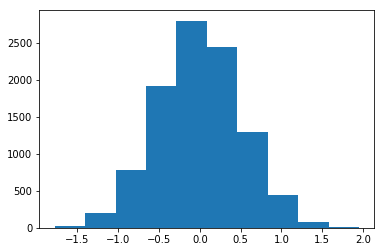

In [222]:
plt.hist(sim[199,0,:])

- Plot asymptotic distribution (seaborn)

In [ ]:
seabr

- Bonus: write a faster simulation routine.

## Exercise 3: interpolation

We consider the function $f(x) = sinc(\lambda x) = \frac{sin(\lambda x)}{x}$.
Let $I=(x_i)_{i=[1,10]}$ be a regularly spaced interval between -2 and +2, containing 10 points. Call $Y=(y_i)=f(x_i)$ the values of $f$ on this interval.
Let $T$ be a test set with 1000 regularly spaced points between -2.5 and 2.5. 

The goal is to compare several ways interpolate function f on $T$.

- Define `f`, `I`, `Y`, `T`

- Construct a stepwise approximation using numpy indexing

- Plot it

- Construct a linear approximation using numpy

- Use scipy.interpolate to get an approximation

- (bonus) Use interpolation.py

- Plot result

- Increase number of points and test performance of various options

- (bonus) optimize hand coded implementations using numba

- (bonus^2) same steps in 2d space